# 📊 Gym Revenue & Attendance Insight Report

This private dashboard shows a breakdown of simulated gym check-in patterns, class time performance, and projected revenue trends — based on real attendance data from the industry.

---

## 🔍 What's Inside

- 📉 Check-in drop-offs and revenue risk zones  
- 🔁 Members likely to churn soon  
- 🔥 Best & worst class times (heatmap)  
- 📁 Monthly PDF + CSV report you can save and review  

---

## 💡 Why It Matters

**I help health and fitness businesses boost revenue and retention — with insights so clear you'll never have to guess what's working again.**

This helps you:
- Spot where you're losing money (and how to fix it)
- Find the most profitable class times
- Re-engage members before they disappear
- Make better business decisions — backed by data

---

## 🛠️ What You Need to Do

Nothing — this is just for you to **view results**.  
I'll handle all the data, updates, and setup.

✅ You’ll get:
- A PDF summary  
- CSV you can open in Excel or Google Sheets  
- Optional next steps if you want deeper insights  

---

**Built for you by:**  
**Kierra Kennedy**  
*“Your gym’s hidden patterns, finally revealed.”*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.4 MB/s eta 0:00:00


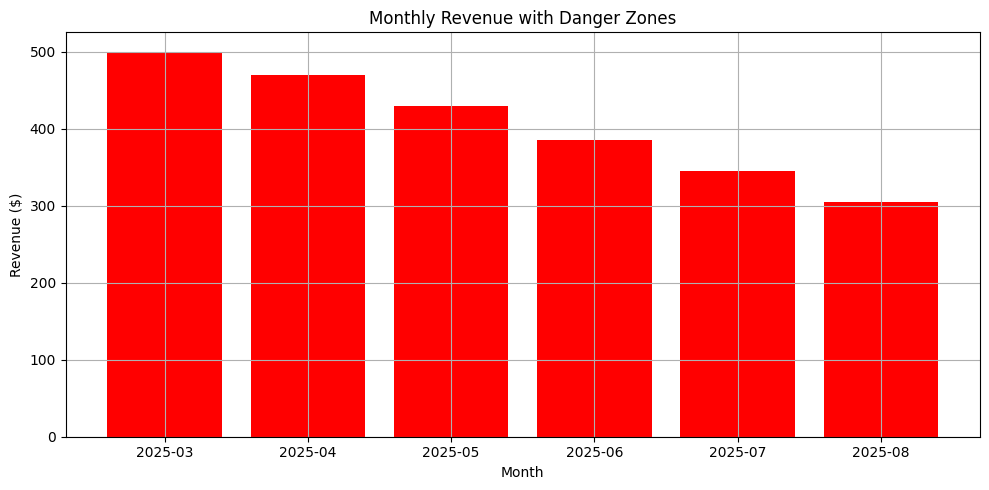

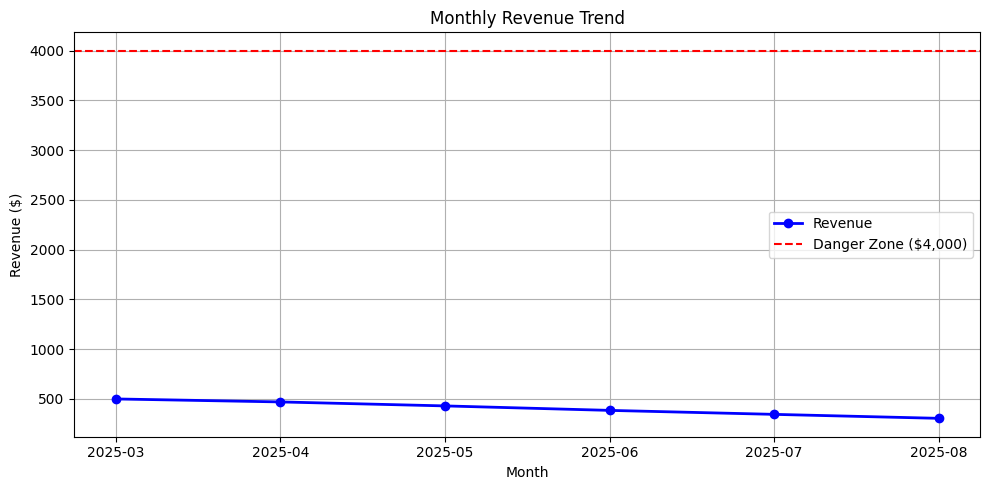

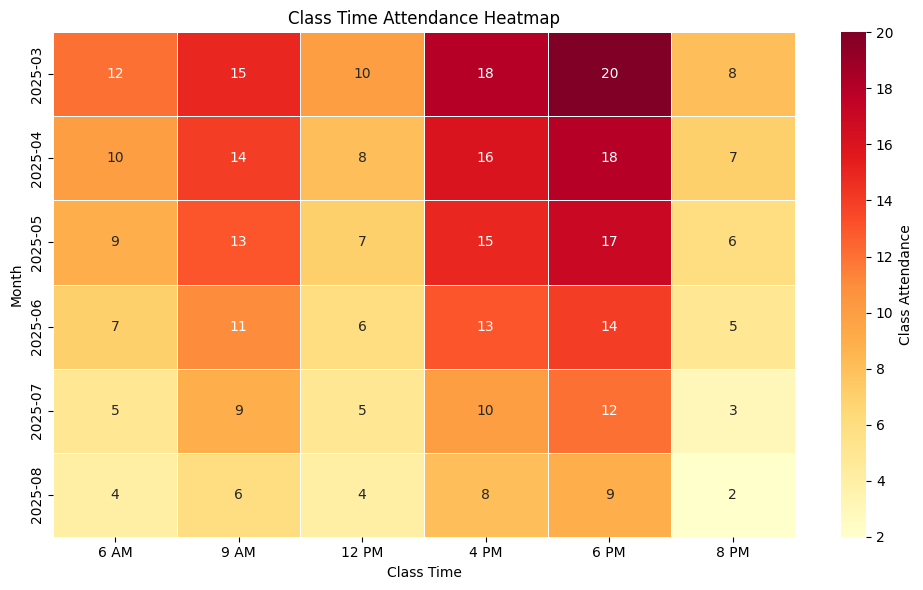

✅ Dashboard complete. CSV and PDF saved to your file sidebar.


In [ ]:
# 📊 GYM ATTENDANCE & REVENUE ANALYSIS DASHBOARD

# STEP 0: Install missing dependencies (only needed in Colab)
!pip install reportlab

# STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

# STEP 2: Simulated Monthly Check-in Data
checkin_totals = {
    '2025-03': 500,
    '2025-04': 470,
    '2025-05': 430,
    '2025-06': 385,
    '2025-07': 345,
    '2025-08': 305
}

# STEP 3: Create DataFrame
df = pd.DataFrame({
    'Month': list(checkin_totals.keys()),
    'Checkins': list(checkin_totals.values())
})

# STEP 4: Calculate Revenue and Metrics
revenue_per_checkin = 1
df['Revenue'] = df['Checkins'] * revenue_per_checkin
df['Revenue_Loss'] = df['Revenue'].iloc[0] - df['Revenue']
df['Danger_Zone'] = df['Revenue'] < 4000
df['Decline_Rate_%'] = df['Checkins'].pct_change().fillna(0) * -100
df['Churn_Warning'] = df['Decline_Rate_%'] > 10
df['Decline_Rate_%'] = df['Decline_Rate_%'].round(1)

# STEP 5: Export to CSV
df.to_csv("revenue_with_churn.csv", index=False)

# STEP 6: Monthly Revenue Bar Chart with Danger Zone
plt.figure(figsize=(10, 5))
colors_bar = ['green' if not danger else 'red' for danger in df['Danger_Zone']]
plt.bar(df['Month'], df['Revenue'], color=colors_bar)
plt.title('Monthly Revenue with Danger Zones')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 7: Monthly Revenue Trend Line Chart
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Revenue'], marker='o', linewidth=2, label='Revenue', color='blue')
plt.axhline(y=4000, color='red', linestyle='--', label='Danger Zone ($4,000)')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Simulated Class Time Attendance Heatmap
heatmap_data = {
    '6 AM':   [12, 10, 9, 7, 5, 4],
    '9 AM':   [15, 14, 13, 11, 9, 6],
    '12 PM':  [10, 8, 7, 6, 5, 4],
    '4 PM':   [18, 16, 15, 13, 10, 8],
    '6 PM':   [20, 18, 17, 14, 12, 9],
    '8 PM':   [8, 7, 6, 5, 3, 2]
}
heatmap_df = pd.DataFrame(heatmap_data, index=df['Month'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5, cbar_kws={'label': 'Class Attendance'})
plt.title('Class Time Attendance Heatmap')
plt.xlabel('Class Time')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# STEP 9: Export PDF Client Report
pdf_path = "Gym_Report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=letter)
styles = getSampleStyleSheet()
story = [Paragraph("📊 Gym Revenue and Churn Report", styles['Title']), Spacer(1, 12)]

summary = "This report tracks revenue, attendance, and churn. Red bars = danger zone (< $4000 revenue). Churn warnings flag months with sharp check-in drops. Heatmap shows class time popularity."
story.append(Paragraph(summary, styles['BodyText']))
story.append(Spacer(1, 12))

# Format Table for PDF
pdf_table_data = [list(df.columns)] + df.astype(str).values.tolist()
table = Table(pdf_table_data)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#444444')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
    ('FONTSIZE', (0, 0), (-1, -1), 8),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 6),
    ('BACKGROUND', (0, 1), (-1, -1), colors.HexColor('#F5F5F5')),
]))
story.append(table)
doc.build(story)

print("✅ Dashboard complete. CSV and PDF saved to your file sidebar.")

In [ ]:
df.to_csv("revenue_with_churn.csv", index=False)